In [462]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings(action='ignore')
fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [463]:
raw_data=pd.read_excel('../csv-data/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [464]:
#데이터 분석과정 ... 
# 주제 -- 수집 -- 전처리 -- EDA -- 예측시스템(회귀, 분류)
# y=ax+b ... a는 기울기 y는 절편 x는 변수값
# y= ax1+bx2+dx3+d
#y는 죽을것인가 살것인가의 예측값. 
# x1,x2,x3 .... 결과를 결전하는 변수들  .... age, pclass, alone

In [465]:
raw_data.describe()
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


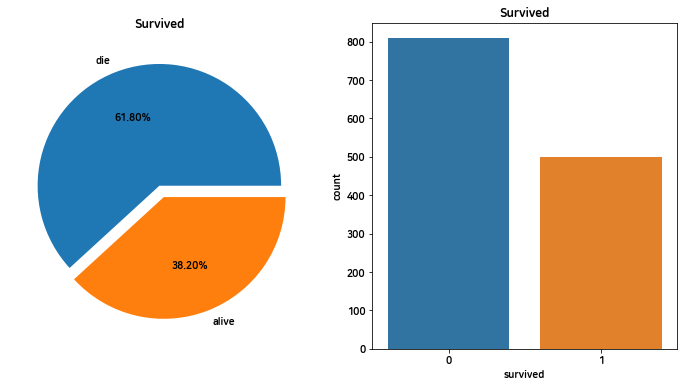

In [466]:
f,ax=plt.subplots(1,2,figsize=(12,6)) #1줄에 두개를 넣겠다. 
x=['die', 'alive']
raw_data['survived'].value_counts().plot.pie(explode=[0,0.1], labels=x,
                                             autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=raw_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

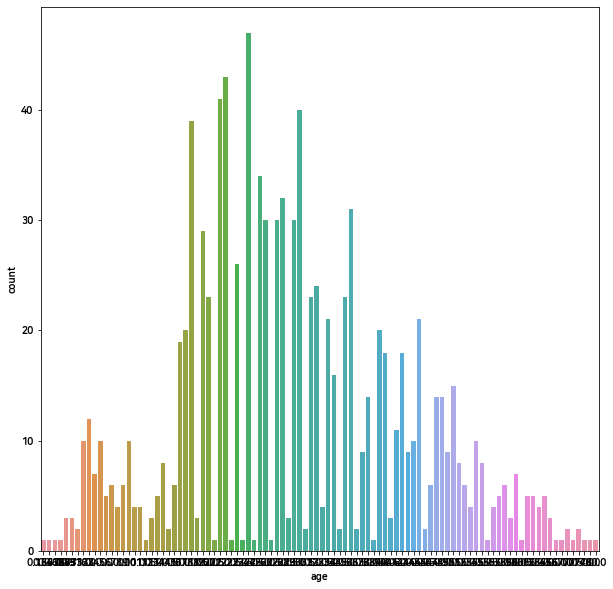

In [467]:
#age 의 분포
plt.figure(figsize=(10, 10))
x=raw_data['age'].value_counts().index.tolist()
y=raw_data['age'].value_counts().values.tolist()
# plt.pie(y, labels=x, autopct='%.0f%%', shadow=True)
sns.countplot('age', data=raw_data)

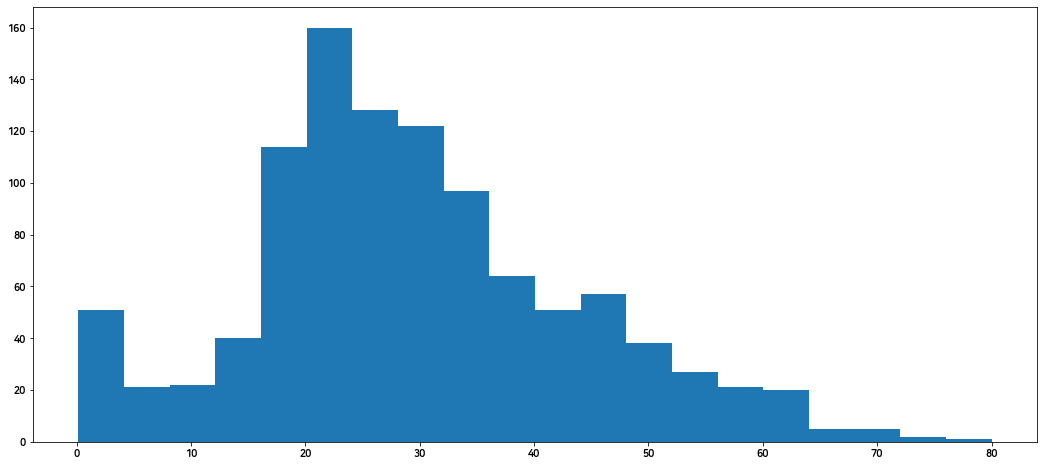

In [468]:
raw_data['age'].hist(bins=20,figsize=(18,8),grid=False);

In [469]:
#pclass의 평균
raw_data['pclass'].mean()

2.294881588999236

In [470]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [471]:
#변수들간의 상관도
r_corr=raw_data.corr()
r_corr

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


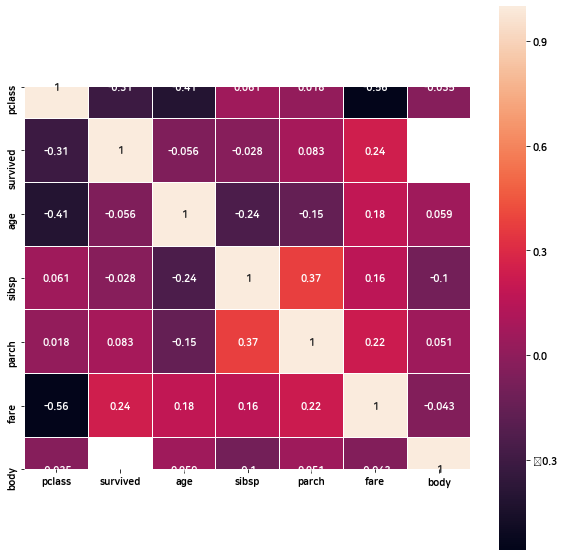

In [472]:
#heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, linecolor="white")
plt.show()

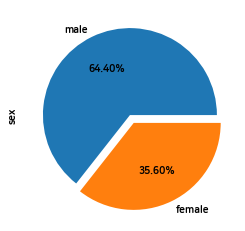

In [473]:
#성별 카운트sex

raw_data['sex'].value_counts().plot.pie(explode=[0,0.1], labels=raw_data['sex'].value_counts().index,
                                             autopct='%1.2f%%')
rd= raw_data['sex'].value_counts()

In [474]:
sex_alive=raw_data.groupby(by='sex')['survived'].sum()
sex_alive

sex
female    339
male      161
Name: survived, dtype: int64

In [475]:
sex_die=rd-sex_alive
sex_die

female    127
male      682
dtype: int64

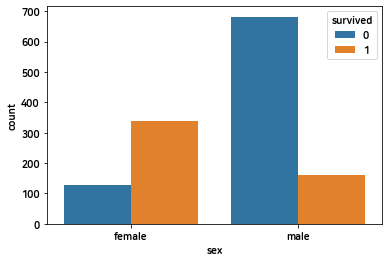

In [476]:

# plt.pie(raw_data.groupby('sex').mean()['survived'], labels=raw_data['sex'].value_counts().index,
#                                              autopct='%1.2f%%')

sns.countplot('sex', hue='survived',data=raw_data)

In [477]:
dd= pd.DataFrame({'alive' : sex_alive, 'board' : rd}, index=['male', 'female'])
dd.reset_index(inplace=True)
dd
# sns.countplot('sex', hue='survived',data=raw_data)

,index,alive,board
0,male,161,843
1,female,339,466


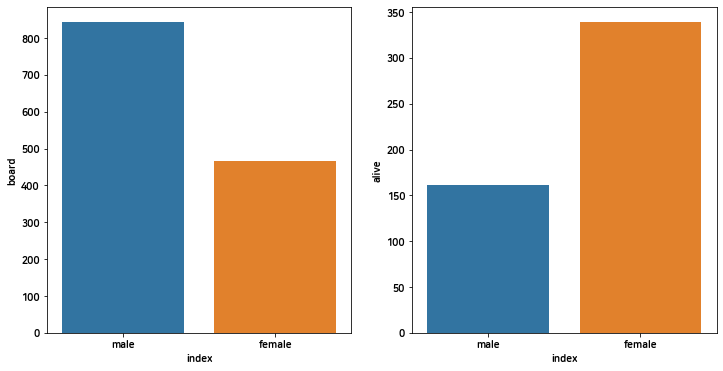

In [478]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.barplot('index', 'board', data=dd, ax=ax[0])
sns.barplot('index', 'alive', data=dd, ax=ax[1])

<Figure size 504x432 with 0 Axes>

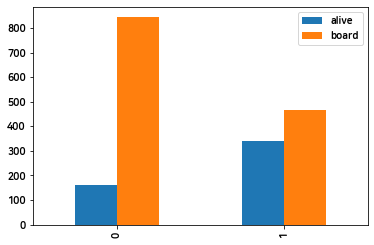

In [479]:
plt.figure(figsize=(7, 6))
dd.plot(kind='bar')
plt.show()

In [480]:
#age의 결측치를 어떻게 해야하는가
#1. 칼럼삭제:너무 결측치가 많은경우, 상관도가 다른 변수들에 비해 많이 낮은경우
#2. 로우(행) 삭제: 결측치가 있는 instance만 삭제 , 삭제해도 다른 instance가 많이 남아있는 경우
#3. 다른값으로 대체 : 대체해도 크게 문제가 없으며, 다른 instance가 많지 않은 경우.. 
# 다른값  ...   숫자인경우 : 0 or  평균.(전체 데이터의 분포를 깨지 않을 목적) or  최빈값. 
#               문자인경우 : 해당사항 없음, 값을 목록으로 만들어서 랜덤으로 넣음... 

In [481]:
raw_data.groupby('sex').mean()['survived']

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

In [482]:
raw_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [483]:
## 나이를 평균으로 대체 
#평균구하기
a= raw_data['age'].mean()
#평균으로 채우기
raw_data['age']=raw_data['age'].fillna(a)


In [484]:
raw_data.isnull().sum()
#다채워졌는지 확인하기

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [485]:
#나이대별 카운트~
# raw_data['age']=pd.cut(raw_data['age'], bins=[0, 20, 35, 55, 100], include_lowest=True, labels=["children","young","adult","old"])

In [486]:
raw_data.drop(columns=['ticket','cabin','embarked','body','boat','home.dest'], inplace=True)

In [487]:
raw_data['age'][:5]

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

In [488]:
raw_data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,fare
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500


In [489]:
# raw_data.groupby(by='age').mean()['survived']

In [490]:
def func(x):
    if x=="female":
        return 0
    else:
        return 1
    

In [491]:
raw_data['sex']=raw_data['sex'].apply(func)
raw_data[:3]

,pclass,survived,name,sex,age,sibsp,parch,fare
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,211.3375
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,151.5500
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,151.5500


In [492]:
# def age_convert(x):
#     if x=="children":
#         return 0
#     elif x=="young":
#         return 1
#     elif x=="adult":
#         return 2
#     else:
#         return 3

In [493]:
# raw_data['age']=raw_data['age'].apply(age_convert)
raw_data[:50]

,pclass,survived,name,sex,age,sibsp,parch,fare
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.000000,0,0,211.3375
1,1,1,"Allison, Master. Hudson Trevor",1,0.916700,1,2,151.5500
2,1,0,"Allison, Miss. Helen Loraine",0,2.000000,1,2,151.5500
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1,2,151.5500
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1,2,151.5500
5,1,1,"Anderson, Mr. Harry",1,48.000000,0,0,26.5500
6,1,1,"Andrews, Miss. Kornelia Theodosia",0,63.000000,1,0,77.9583
7,1,0,"Andrews, Mr. Thomas Jr",1,39.000000,0,0,0.0000
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",0,53.000000,2,0,51.4792
9,1,0,"Artagaveytia, Mr. Ramon",1,71.000000,0,0,49.5042


In [494]:
raw_data['fare']utf8.sum()

1

In [495]:
raw_data['fare'].fillna(raw_data['fare'].mean(), inplace=True)

In [496]:
raw_data['fare'].isnull().sum()

0

In [497]:
raw_data.drop(columns=['name'], inplace=True)

In [336]:
#1. 먼저 공부를 많이하고(훈련데이터 : train data)
#2. 모의고사 (75점이상) (테스트 데이터 : test data)
#3. 실제로 예측하는 프로그램 사용할예정-본시험

In [337]:
from sklearn.model_selection import train_test_split


In [341]:
df_data= raw_data[['pclass','sex','age','sibsp','parch','fare','survived']] #공부시킬목록 .... 불러옴
df_data


,pclass,sex,age,sibsp,parch,fare,survived
0,1,0,29.000000,0,0,211.3375,1
1,1,1,0.916700,1,2,151.5500,1
2,1,0,2.000000,1,2,151.5500,0
3,1,1,30.000000,1,2,151.5500,0
4,1,0,25.000000,1,2,151.5500,0
...,...,...,...,...,...,...,...
1304,3,0,14.500000,1,0,14.4542,0
1305,3,0,29.881135,1,0,14.4542,0
1306,3,1,26.500000,0,0,7.2250,0
1307,3,1,27.000000,0,0,7.2250,0


In [345]:
exam= raw_data[['pclass','sex','age','sibsp','parch','fare']]#정답만 뺴고!
exam

,pclass,sex,age,sibsp,parch,fare
0,1,0,29.000000,0,0,211.3375
1,1,1,0.916700,1,2,151.5500
2,1,0,2.000000,1,2,151.5500
3,1,1,30.000000,1,2,151.5500
4,1,0,25.000000,1,2,151.5500
...,...,...,...,...,...,...
1304,3,0,14.500000,1,0,14.4542
1305,3,0,29.881135,1,0,14.4542
1306,3,1,26.500000,0,0,7.2250
1307,3,1,27.000000,0,0,7.2250


In [501]:
target= df_data['survived']

In [502]:
#X_train, X_test, y_train, y_test
train_exam, test_exam, train_target, test_target = train_test_split(exam, 
                                                                    target,
                                                                    test_size=0.2, #검증비율 20% 훈련비율 80%
                                                                    random_state=100 #seed 값
                                                                   )
#훈련문제, 검증문제, 훈련답, 검증답

In [503]:
train_target.count()
test_target.count()

262

In [504]:
#공부방법선택:정형화 된것 ====> 알고리즘, 방법론, 모델링
#컴퓨터가 학습할 방법론을 선택해서 알려주어야함. 
#방법은 클래스로 만들어져있음

In [505]:
train_exam.head()

,pclass,sex,age,sibsp,parch,fare
16,1,1,24.0,0,1,247.5208
538,2,1,30.0,0,0,12.7375
532,2,1,41.0,0,0,13.0000
285,1,1,67.0,1,0,221.7792
365,2,0,44.0,1,0,26.0000


In [506]:
train_exam.reset_index(inplace=True) #인덱스 정돈
test_exam.reset_index(inplace=True) #인덱스 정돈


In [507]:
del train_exam['index']


In [508]:
del train_exam['level_0']

KeyError: 'level_0'

In [509]:
del test_exam['index']

In [510]:
test_exam
train_exam

,pclass,sex,age,sibsp,parch,fare
0,1,1,24.000000,0,1,247.5208
1,2,1,30.000000,0,0,12.7375
2,2,1,41.000000,0,0,13.0000
3,1,1,67.000000,1,0,221.7792
4,2,0,44.000000,1,0,26.0000
...,...,...,...,...,...,...
1042,3,1,29.881135,0,0,6.9500
1043,1,1,17.000000,0,0,47.1000
1044,2,0,15.000000,0,2,39.0000
1045,1,0,55.000000,2,0,25.7000


In [511]:
test_target=test_target.reset_index() 

In [512]:
test_target.drop(columns=['level_0'], inplace=True)

KeyError: "['level_0'] not found in axis"

In [513]:
test_target.drop(columns=['index'], inplace=True)

In [514]:
test_target

,survived
0,0
1,0
2,0
3,0
4,1
...,...
257,1
258,0
259,0
260,0


In [515]:
train_target=train_target.reset_index()
train_target.drop(columns='index', inplace=True)


In [516]:
train_target

,survived
0,0
1,1
2,0
3,0
4,0
...,...
1042,0
1043,0
1044,1
1045,1


In [517]:
test_target

,survived
0,0
1,0
2,0
3,0
4,1
...,...
257,1
258,0
259,0
260,0


In [518]:
from sklearn.tree import DecisionTreeClassifier

In [519]:
tree_clf=DecisionTreeClassifier(max_depth=3, 
                                random_state=42
                               )

In [520]:
tree_clf.fit(train_exam, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [521]:
tree_clf.score(train_exam,train_target)

#trainData의 정확도..... !! accuracy 

0.8194842406876791

In [522]:
from sklearn.metrics import accuracy_score


In [523]:
com_target=tree_clf.predict(test_exam)

In [524]:
com_target[:5]#컴퓨터가 푼 답안지. 

array([0, 0, 0, 1, 1], dtype=int64)

In [525]:
accuracy_score(test_target, com_target)

0.8053435114503816

In [526]:
accuracy_score(test_target, com_target)

0.8053435114503816

In [527]:
dicaprio=[3,1,19,0,0,5]

In [528]:
train_exam.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [529]:
result=tree_clf.predict_proba([dicaprio])
#array([[1., 0.]])  죽음일 가능성 1 (100%) 살았을 가능성 0 0%

In [530]:
result[0][1]

0.12625250501002003

In [531]:
def func_r(r):
    if r[0][1]>r[0][0]:
        print("살았을 가능성이 더 크다.")
        print("가능성 지수 :",r[0][1]*100,"%")
    else:
        print("죽었을 가능성이 더 크다.")
        print("가능성 지수 :",r[0][0]*100,"%" )

In [532]:
func_r(result)

죽었을 가능성이 더 크다.
가능성 지수 : 87.374749498998 %


In [533]:
winslet=[1,0,17,1,1,100]

In [534]:
result1=tree_clf.predict_proba([winslet, dicaprio])
#predict_proba함수의 입력값타입은 [[]] 2차원리스트여야한다. 

In [535]:
func_r(result1)

살았을 가능성이 더 크다.
가능성 지수 : 97.74436090225564 %


In [553]:
yusubin=[3,0,23,4,0,10]
result12=tree_clf.predict_proba([yusubin])

In [554]:
func_r(result12)

살았을 가능성이 더 크다.
가능성 지수 : 58.94039735099338 %


In [563]:
print(tree_clf.feature_importances_)

[0.17721694 0.68203511 0.04086365 0.05128195 0.         0.04860236]


In [556]:
#가중치가 거의 없 :: sibsp , parch, fare, age
#가중치가 중간정도 있었던 피쳐 ... pclass
#가중치가 정말 컸던 피쳐는 ... sex 

#그래프로 그려봐라


In [557]:
a=tree_clf.feature_importances_

In [559]:
a
li=['pclass','sex','age','sibsp','parch','fare']

<BarContainer object of 6 artists>

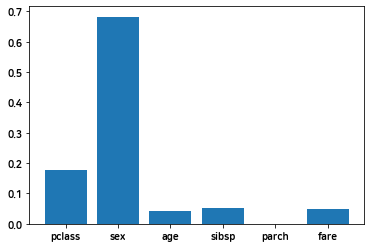

In [560]:
plt.bar(li,a)


In [659]:
iris=sns.load_dataset('iris')

In [660]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [661]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [662]:
# def speices_convert(x):
#     if x=="virginica":
#         return 0
#     elif x=="setosa":
#         return 1
#     else:
#         return 2

In [663]:
# iris['species']=iris['species'].apply(speices_convert)

In [676]:
#X_train, X_test, y_train, y_test
train_exam, test_exam, train_target, test_target = train_test_split(iris.iloc[:,:4], 
                                                                    iris['species'],
                                                                    test_size=0.2, #검증비율 20% 훈련비율 80%
                                                                    random_state=100 #seed 값
                                                                   )
#훈련문제, 검증문제, 훈련답, 검증답

In [3]:
tree_clf=DecisionTreeClassifier(max_depth=3, 
                                random_state=42
                               )

NameError: name 'DecisionTreeClassifier' is not defined

In [4]:
tree_clf.fit(train_exam,train_target)

NameError: name 'tree_clf' is not defined

In [680]:
tree_clf.feature_importances_

array([0.        , 0.        , 0.59655894, 0.40344106])

In [681]:
tree_clf.score(train_exam, train_target) 

0.9833333333333333

In [682]:
com_target = tree_clf.predict(test_exam)

In [650]:
train_exam.reset_index(inplace=True)
test_exam.reset_index(inplace=True)

ValueError: Classification metrics can't handle a mix of multiclass and multiclass-multioutput targets

In [606]:
train_exam.drop(columns='index')
# train_exam['index']

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.4,3.7,1.0
1,5.7,2.8,4.1,1.3
2,6.0,2.2,5.0,1.5
3,4.8,3.0,1.4,0.1
4,5.4,3.9,1.3,0.4
...,...,...,...,...
115,6.3,2.3,4.4,1.3
116,6.3,2.9,5.6,1.8
117,5.8,2.7,4.1,1.0
118,4.8,3.4,1.9,0.2


In [607]:
test_exam.drop(columns='index')

,sepal_length,sepal_width,petal_length,petal_width
0,6.4,2.8,5.6,2.1
1,4.8,3.4,1.6,0.2
2,7.7,2.6,6.9,2.3
3,5.7,4.4,1.5,0.4
4,6.3,2.7,4.9,1.8
5,7.7,3.0,6.1,2.3
6,5.2,4.1,1.5,0.1
7,4.9,3.0,1.4,0.2
8,6.5,3.0,5.5,1.8
9,4.8,3.0,1.4,0.3


In [608]:
train_target=train_target.reset_index()
test_target=test_target.reset_index()

In [609]:
train_target.drop(columns='index')
test_target.drop(columns='index')

,species
0,0
1,1
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,1


In [610]:
test_target['species'].unique()

array([0, 1, 2], dtype=int64)

In [611]:
tree_clf=DecisionTreeClassifier(max_depth=3, 
                                random_state=42
                               )

In [612]:
tree_clf.fit(train_exam, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [613]:
# raw_data['age']=raw_data['age'].apply(age_convert)

In [614]:
tree_clf.score(train_exam,train_target)

ValueError: multiclass-multioutput is not supported

In [615]:
from sklearn.metrics import accuracy_score
com_target=tree_clf.predict(test_exam)


In [618]:
accuracy_score(test_target, com_target)

ValueError: multiclass-multioutput is not supported

In [ ]:
tree_clf.feature_importances_

In [1]:
titanic.target_names

NameError: name 'titanic' is not defined